In [14]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

ModuleNotFoundError: No module named 'termios'

In [3]:
import pandas as pd

In [15]:
train_df = pd.read_csv('train.csv')
view_log_df = pd.read_csv('view_log.csv')
item_data_df = pd.read_csv('item_data.csv')

In [5]:
trainFile.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [13]:
trainFile.groupby('is_click').count()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
is_click,,,,,,
0,226747,226747,226747,226747,226747,226747
1,10862,10862,10862,10862,10862,10862


In [16]:
item_view_log_df = pd.merge(view_log_df, item_data_df, on='item_id', how='left')

In [17]:

item_view_log_df.drop_duplicates(inplace=True)

In [18]:
item_view_log_df.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-10-15 08:58:00,android,112333,4557,32970,54685.0,16.0,56.0,253.0,3184.0
1,2018-10-15 08:58:00,android,503590,74788,7640,1376.0,7.0,71.0,228.0,545.0
2,2018-10-15 08:58:00,android,573960,23628,128855,4544.0,4.0,38.0,62.0,5609.0
3,2018-10-15 08:58:00,android,121691,2430,12774,904.0,17.0,39.0,252.0,2740.0
4,2018-10-15 08:58:00,android,218564,19227,28296,2304.0,12.0,57.0,54.0,7422.0


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
cols = ['device_type']
for col in cols:
    if item_view_log_df[col].dtype==object:
        print(col)
        lbl = LabelEncoder()
        lbl.fit(list(item_view_log_df[col].values.astype('str')))
        item_view_log_df[col] = lbl.transform(list(item_view_log_df[col].values.astype('str')))

device_type


In [27]:
item_view_log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017496 entries, 0 to 3118621
Data columns (total 10 columns):
server_time     object
device_type     int64
session_id      int64
user_id         int64
item_id         int64
item_price      float64
category_1      float64
category_2      float64
category_3      float64
product_type    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 253.2+ MB


In [25]:
item_view_log_df['device_type'].value_counts()

0    3016689
1        783
2         24
Name: device_type, dtype: int64

In [28]:
item_view_log_df['server_time'] = pd.to_datetime(item_view_log_df['server_time'])

In [32]:
item_view_log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017496 entries, 0 to 3118621
Data columns (total 10 columns):
server_time     datetime64[ns]
device_type     int64
session_id      int64
user_id         int64
item_id         int64
item_price      float64
category_1      float64
category_2      float64
category_3      float64
product_type    float64
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 253.2 MB


In [31]:
view_log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118622 entries, 0 to 3118621
Data columns (total 5 columns):
server_time    object
device_type    object
session_id     int64
user_id        int64
item_id        int64
dtypes: int64(3), object(2)
memory usage: 119.0+ MB


In [33]:
item_view_log_df["log_Year"] = item_view_log_df["server_time"].dt.year

item_view_log_df["log_Month"] = item_view_log_df["server_time"].dt.month

item_view_log_df["log_Day"] = item_view_log_df["server_time"].dt.day

item_view_log_df["log_WeekDay"] = item_view_log_df["server_time"].dt.weekday

item_view_log_df["log_time"] = item_view_log_df["server_time"].dt.time

item_view_log_df[['log_h','log_m','log_s']] = item_view_log_df['log_time'].astype(str).str.split(':', expand=True).astype(int)

In [34]:
item_view_log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017496 entries, 0 to 3118621
Data columns (total 18 columns):
server_time     datetime64[ns]
device_type     int64
session_id      int64
user_id         int64
item_id         int64
item_price      float64
category_1      float64
category_2      float64
category_3      float64
product_type    float64
log_Year        int64
log_Month       int64
log_Day         int64
log_WeekDay     int64
log_time        object
log_h           int32
log_m           int32
log_s           int32
dtypes: datetime64[ns](1), float64(5), int32(3), int64(8), object(1)
memory usage: 402.9+ MB


In [36]:
import numpy as np

In [37]:
# interval of days the user was active
days_active = item_view_log_df.reset_index().groupby(['user_id'])['server_time'].agg(
    lambda x: (x.max() - x.min()).days if (x.max() - x.min()).days !=0 else 1)

# number of days user was active
unique_days_active = item_view_log_df.reset_index().groupby(['user_id'])['server_time'].agg(
    lambda x: len(np.unique(x.dt.dayofyear)))


user_time_features = days_active.reset_index().merge(unique_days_active.reset_index(),on='user_id',how = 'left')

user_time_features.columns = ['user_id','log_days_active','log_unique_days_active']

In [41]:
user_time_features.sort_values(['log_days_active', 'log_unique_days_active'], ascending = False)

,user_id,log_days_active,log_unique_days_active
69483,72172,57,58
21872,22726,57,56
51869,53899,57,56
20470,21279,57,55
30914,32105,57,55
32821,34082,57,55
50110,52050,57,55
84524,87769,57,55
17072,17745,57,54
43636,45315,57,54


In [42]:
pd.pivot_table?

In [43]:
log_Month_df = pd.pivot_table(item_view_log_df, values="session_id", index="user_id", columns="log_Month", aggfunc="count", fill_value=0).reset_index()
print(log_Month_df.columns)

log_Month_df.columns = ["user_id"] + ["log_Month_"+str(i) for i in range(10,13)]

Index(['user_id', 10, 11, 12], dtype='object', name='log_Month')


In [81]:

import numpy as np
import pandas as pd
from scipy.stats import mode
from sklearn import metrics, preprocessing, model_selection
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from collections import defaultdict, Counter
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns


import string
from imblearn.over_sampling import SMOTE, ADASYN

%matplotlib inline

pd.options.display.max_columns = 100
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [78]:
%matplotlib inline
pd.options.display.max_columns = 100
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [82]:
log_Month_df.head()

,user_id,log_Month_10,log_Month_11,log_Month_12
0,0,7,21,9
1,1,0,2,6
2,2,80,65,18
3,3,8,0,0
4,4,0,0,2


In [ ]:
item_view_log_df.groupby(['user_id', 'log_Month']).agg

In [62]:
log_Month_df2.unstack?

In [67]:
log_Month_df2 = item_view_log_df.groupby(['user_id', 'log_Month'])['session_id'].agg(['count'], fill_value = 0)

In [63]:
log_Month_df2.unstack(fill_value=0).reset_index().head()

user_id count        
log_Month            10  11  12
0               0     7  21   9
1               1     0   2   6
2               2    80  65  18
3               3     8   0   0
4               4     0   0   2

In [64]:

log_WeekDay_df = pd.pivot_table(item_view_log_df, values="session_id", index="user_id", columns="log_WeekDay", aggfunc="count", fill_value=0).reset_index()
print(log_WeekDay_df.columns)


log_WeekDay_df.columns = ["user_id"] + ["log_WeekDay_"+str(i) for i in range(0,7)]

Index(['user_id', 0, 1, 2, 3, 4, 5, 6], dtype='object', name='log_WeekDay')


In [65]:
log_WeekDay_df.head()

,user_id,log_WeekDay_0,log_WeekDay_1,log_WeekDay_2,log_WeekDay_3,log_WeekDay_4,log_WeekDay_5,log_WeekDay_6
0,0,2,2,7,6,3,0,17
1,1,1,0,0,0,0,0,7
2,2,30,26,29,31,9,0,38
3,3,0,0,0,0,8,0,0
4,4,0,0,0,0,2,0,0


In [83]:
category_2_df = pd.pivot_table(item_view_log_df, values="item_id", index="user_id", columns="category_2", aggfunc="count", fill_value=0).reset_index()
category_2_df.columns = ["user_id"] + ["cat_2_"+str(i) for i in range(0,79)]

In [84]:
category_2_df.head()

,user_id,cat_2_0,cat_2_1,cat_2_2,cat_2_3,cat_2_4,cat_2_5,cat_2_6,cat_2_7,cat_2_8,cat_2_9,cat_2_10,cat_2_11,cat_2_12,cat_2_13,cat_2_14,cat_2_15,cat_2_16,cat_2_17,cat_2_18,cat_2_19,cat_2_20,cat_2_21,cat_2_22,cat_2_23,cat_2_24,cat_2_25,cat_2_26,cat_2_27,cat_2_28,cat_2_29,cat_2_30,cat_2_31,cat_2_32,cat_2_33,cat_2_34,cat_2_35,cat_2_36,cat_2_37,cat_2_38,cat_2_39,cat_2_40,cat_2_41,cat_2_42,cat_2_43,cat_2_44,cat_2_45,cat_2_46,cat_2_47,cat_2_48,cat_2_49,cat_2_50,cat_2_51,cat_2_52,cat_2_53,cat_2_54,cat_2_55,cat_2_56,cat_2_57,cat_2_58,cat_2_59,cat_2_60,cat_2_61,cat_2_62,cat_2_63,cat_2_64,cat_2_65,cat_2_66,cat_2_67,cat_2_68,cat_2_69,cat_2_70,cat_2_71,cat_2_72,cat_2_73,cat_2_74,cat_2_75,cat_2_76,cat_2_77,cat_2_78
0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,4,0,0,4,0,0,2,0,0,4,0,0,1,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,2,0,1,0,4,3,0,0,3,8,3,4,0,5,3,0,0,0,2,1,0,1,3,0,3,1,0,9,0,7,3,0,2,2,0,0,1,4,2,6,2,3,11,6,5,1,2,1,0,0,0,6,0,0,0,3,0,7,5,0,0,6,2,2,4,0,3,0,2,0,2,0,0,0,3,0,3,1,2,0
3,3,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
pd.cut?

In [86]:
bins = [0,7,15,22,31]

group_names = [1, 2, 3, 4]
item_view_log_df['Month_wk_grp'] = pd.cut(item_view_log_df['log_Day'], bins, labels=group_names)
item_view_log_df.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type,log_Year,log_Month,log_Day,log_WeekDay,log_time,log_h,log_m,log_s,Month_wk_grp
0,2018-10-15 08:58:00,0,112333,4557,32970,54685.0,16.0,56.0,253.0,3184.0,2018,10,15,0,08:58:00,8,58,0,2
1,2018-10-15 08:58:00,0,503590,74788,7640,1376.0,7.0,71.0,228.0,545.0,2018,10,15,0,08:58:00,8,58,0,2
2,2018-10-15 08:58:00,0,573960,23628,128855,4544.0,4.0,38.0,62.0,5609.0,2018,10,15,0,08:58:00,8,58,0,2
3,2018-10-15 08:58:00,0,121691,2430,12774,904.0,17.0,39.0,252.0,2740.0,2018,10,15,0,08:58:00,8,58,0,2
4,2018-10-15 08:58:00,0,218564,19227,28296,2304.0,12.0,57.0,54.0,7422.0,2018,10,15,0,08:58:00,8,58,0,2


In [89]:
item_view_log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017496 entries, 0 to 3118621
Data columns (total 19 columns):
server_time     datetime64[ns]
device_type     int64
session_id      int64
user_id         int64
item_id         int64
item_price      float64
category_1      float64
category_2      float64
category_3      float64
product_type    float64
log_Year        int64
log_Month       int64
log_Day         int64
log_WeekDay     int64
log_time        object
log_h           int32
log_m           int32
log_s           int32
Month_wk_grp    int64
dtypes: datetime64[ns](1), float64(5), int32(3), int64(9), object(1)
memory usage: 505.9+ MB


In [88]:
item_view_log_df['Month_wk_grp'] = pd.to_numeric(item_view_log_df['Month_wk_grp'])

In [91]:
log_Month_wk_grp_df = pd.pivot_table(item_view_log_df, index="user_id", columns="Month_wk_grp",
                                     values="session_id", aggfunc="count", fill_value=0).reset_index()
log_Month_wk_grp_df.columns = ["user_id"] + ["log_Month_wk_grp_"+str(i) for i in range(1,5)]

In [92]:
log_Month_wk_grp_df.head()

,user_id,log_Month_wk_grp_1,log_Month_wk_grp_2,log_Month_wk_grp_3,log_Month_wk_grp_4
0,0,10,19,5,3
1,1,2,6,0,0
2,2,39,9,75,40
3,3,0,0,8,0
4,4,2,0,0,0


In [93]:
test_df = pd.read_csv('test.csv')

In [95]:
from matplotlib_venn import venn2, venn2_circles

In [96]:
def get_venn(axarr, feature):
    axarr[0,0].set_title(f'Overlap between {feature} in train and test')
    venn2([set(train_df[feature].values), set(test_df[feature].values)], set_labels = ('train','test'), ax=axarr[0,0])
    
    axarr[0,1].set_title(f'Overlap between {feature} in train and hist')
    venn2([set(train_df[feature].values), set(item_view_log_df[feature].values)], set_labels = ('train','hist'), ax=axarr[0,1])
    
    axarr[1,0].set_title(f'Overlap between {feature} in test and hist')
    venn2([set(test_df[feature].values), set(item_view_log_df[feature].values)], set_labels = ('test','hist'), ax=axarr[1,0])
    
    axarr[1,1].set_title(f'Overlap between {feature} in train and test')
    venn2([set(train_df[feature].values), set(test_df[feature].values)], set_labels = ('train','test'), ax=axarr[1,1])

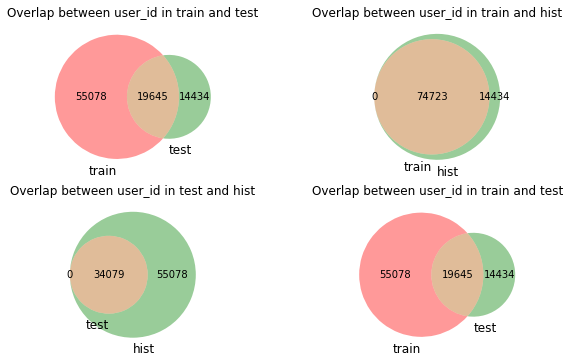

In [97]:
fig, axarr = plt.subplots(2,2, figsize=(10,6))
get_venn(axarr, 'user_id')

In [98]:
full_df = train_df.append(test_df)

In [100]:
full_df.dtypes

app_code             int64
impression_id       object
impression_time     object
is_4G                int64
is_click           float64
os_version          object
user_id              int64
dtype: object

In [101]:
full_df['impression_time'] = pd.to_datetime(full_df['impression_time'])

In [102]:
full_df["Year"] = full_df["impression_time"].dt.year

full_df["Month"] = full_df["impression_time"].dt.month

full_df["Day"] = full_df["impression_time"].dt.day

full_df["WeekDay"] = full_df["impression_time"].dt.weekday

full_df["time"] = full_df["impression_time"].dt.time

full_df[['h','m','s']] = full_df['time'].astype(str).str.split(':', expand=True).astype(int)

In [103]:
full_df.head()

,app_code,impression_id,impression_time,is_4G,is_click,os_version,user_id,Year,Month,Day,WeekDay,time,h,m,s
0,422,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,0,0.0,old,87862,2018,11,15,3,00:00:00,0,0,0
1,467,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,1,1.0,latest,63410,2018,11,15,3,00:01:00,0,1,0
2,259,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,1,0.0,intermediate,71748,2018,11,15,3,00:02:00,0,2,0
3,244,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,1,0.0,latest,69209,2018,11,15,3,00:02:00,0,2,0
4,473,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,0,0.0,latest,62873,2018,11,15,3,00:02:00,0,2,0


In [104]:
gdf = pd.pivot_table(full_df, index="user_id", columns="Year", values="impression_id", aggfunc="count", fill_value=0).reset_index()
full_df = pd.merge(full_df, gdf, on="user_id", how="left")

In [111]:
gdf.head()

Year,user_id,2018
0,0,1
1,1,1
2,2,4
3,3,1
4,4,2


In [105]:
full_df.head()

,app_code,impression_id,impression_time,is_4G,is_click,os_version,user_id,Year,Month,Day,WeekDay,time,h,m,s,2018
0,422,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,0,0.0,old,87862,2018,11,15,3,00:00:00,0,0,0,3
1,467,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,1,1.0,latest,63410,2018,11,15,3,00:01:00,0,1,0,61
2,259,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,1,0.0,intermediate,71748,2018,11,15,3,00:02:00,0,2,0,13
3,244,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,1,0.0,latest,69209,2018,11,15,3,00:02:00,0,2,0,4
4,473,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,0,0.0,latest,62873,2018,11,15,3,00:02:00,0,2,0,16


In [112]:
gdf = pd.pivot_table(full_df, index="user_id", columns="Month", values="impression_id", aggfunc="count", fill_value=0).reset_index()
gdf.columns = ["user_id"] + ["Month_"+str(i) for i in range(11,13)]
full_df = pd.merge(full_df, gdf, on="user_id", how="left")

In [115]:
gdf = pd.pivot_table(full_df, index="user_id", columns="Day", values="impression_id", aggfunc="count", fill_value=0).reset_index()
gdf.columns = ["user_id"] + ["Day_"+str(i) for i in range(1,31)]
full_df = pd.merge(full_df, gdf, on="user_id", how="left")

In [116]:
gdf = pd.pivot_table(full_df, index="user_id", columns="WeekDay", values="impression_id", aggfunc="count", fill_value=0).reset_index()
gdf.columns = ["user_id"] + ["WeekDay_"+str(i) for i in range(0,7)]
full_df = pd.merge(full_df, gdf, on="user_id", how="left")

In [117]:
ad_days_active = full_df.reset_index().groupby(['user_id'])['impression_time'].agg(lambda x: 
                                        (x.max() - x.min()).days if (x.max() - x.min()).days !=0 else 1)

ad_unique_days_active = full_df.reset_index().groupby(['user_id'])['impression_time'].agg(lambda x: 
                                        len(np.unique(x.dt.dayofyear)))

ad_user_time_features = ad_days_active.reset_index().merge(ad_unique_days_active.reset_index(),on='user_id',how = 'left')

ad_user_time_features.columns = ['user_id','ad_days_active','ad_unique_days_active']

In [118]:

full_df = pd.merge(full_df, ad_user_time_features, on="user_id", how="left")

In [119]:

full_df.head()

,app_code,impression_id,impression_time,is_4G,is_click,os_version,user_id,Year,Month,Day,WeekDay,time,h,m,s,2018,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,WeekDay_0,WeekDay_1,WeekDay_2,WeekDay_3,WeekDay_4,WeekDay_5,WeekDay_6,ad_days_active,ad_unique_days_active
0,422,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,0,0.0,old,87862,2018,11,15,3,00:00:00,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,2
1,467,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,1,1.0,latest,63410,2018,11,15,3,00:01:00,0,1,0,61,29,32,2,2,2,2,2,2,2,2,2,2,2,2,0,2,4,4,4,2,2,2,2,2,1,2,2,2,2,0,2,2,10,8,6,8,9,10,10,32,31
2,259,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,1,0.0,intermediate,71748,2018,11,15,3,00:02:00,0,2,0,13,7,6,0,0,0,0,0,0,0,0,0,0,0,2,0,2,2,2,0,0,2,0,0,0,1,0,0,0,0,0,2,0,2,0,2,4,3,0,2,31,7
3,244,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,1,0.0,latest,69209,2018,11,15,3,00:02:00,0,2,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,7,3
4,473,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,0,0.0,latest,62873,2018,11,15,3,00:02:00,0,2,0,16,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,2,2,2,0,0,2,0,0,0,0,0,0,2,2,4,2,2,4,10,8


In [121]:

category_1_df = pd.pivot_table(item_view_log_df, values="item_id", index="user_id", columns="category_1", aggfunc="count", fill_value=0).reset_index()
print(category_1_df.columns)

category_1_df.columns = ["user_id"] + ["cat_1_"+str(i) for i in range(0,17)]

Index(['user_id',       0.0,       1.0,       2.0,       4.0,       5.0,
             6.0,       7.0,       8.0,       9.0,      10.0,      11.0,
            12.0,      13.0,      14.0,      15.0,      16.0,      17.0],
      dtype='object', name='category_1')


In [122]:
full_df = pd.merge(full_df, category_1_df, on="user_id", how="left")

In [123]:

full_df = pd.merge(full_df, log_WeekDay_df, on="user_id", how="left")

In [138]:
full_df.head()

,app_code,impression_id,impression_time,is_4G,is_click,os_version,user_id,Year,Month,Day,WeekDay,time,h,m,s,2018,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,WeekDay_0,WeekDay_1,WeekDay_2,WeekDay_3,WeekDay_4,WeekDay_5,WeekDay_6,ad_days_active,ad_unique_days_active,cat_1_0,cat_1_1,cat_1_2,cat_1_3,cat_1_4,cat_1_5,cat_1_6,cat_1_7,cat_1_8,cat_1_9,cat_1_10,cat_1_11,cat_1_12,cat_1_13,cat_1_14,cat_1_15,cat_1_16,log_WeekDay_0,log_WeekDay_1,log_WeekDay_2,log_WeekDay_3,log_WeekDay_4,log_WeekDay_5,log_WeekDay_6
0,422,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,0,0.0,old,87862,2018,11,15,3,00:00:00,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0
1,467,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,1,1.0,latest,63410,2018,11,15,3,00:01:00,0,1,0,61,29,32,2,2,2,2,2,2,2,2,2,2,2,2,0,2,4,4,4,2,2,2,2,2,1,2,2,2,2,0,2,2,10,8,6,8,9,10,10,32,31,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0,1,2,0,1,3
2,259,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,1,0.0,intermediate,71748,2018,11,15,3,00:02:00,0,2,0,13,7,6,0,0,0,0,0,0,0,0,0,0,0,2,0,2,2,2,0,0,2,0,0,0,1,0,0,0,0,0,2,0,2,0,2,4,3,0,2,31,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0
3,244,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,1,0.0,latest,69209,2018,11,15,3,00:02:00,0,2,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,7,3,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0,3.0,0.0,0.0,3.0,0.0,0.0,2.0,2,0,9,1,1,4,1
4,473,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,0,0.0,latest,62873,2018,11,15,3,00:02:00,0,2,0,16,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,2,2,2,0,0,2,0,0,0,0,0,0,2,2,4,2,2,4,10,8,0.0,4.0,0.0,3.0,0.0,1.0,4.0,3.0,7.0,1.0,7.0,3.0,1.0,1.0,1.0,0.0,9.0,7,4,9,15,5,2,3


In [139]:
full_df = pd.merge(full_df, log_Month_df, on="user_id", how="left")

In [140]:
full_df = pd.merge(full_df, log_Month_wk_grp_df, on="user_id", how="left")

In [141]:
cols = ['os_version']
for col in cols:
    if full_df[col].dtype==object:
        print(col)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(full_df[col].values.astype('str')))
        full_df[col] = lbl.transform(list(full_df[col].values.astype('str')))

os_version


In [142]:
ATTRIBUTION_CATEGORIES = [        
    # V1 Features #
    ###############
    ['app_code'], ['os_version'], ['is_4G'],
    
    # V2 Features #
    ###############
    ['app_code', 'os_version'],
    ['app_code', 'is_4G'],
    ['os_version', 'is_4G']
    
 
]

In [161]:
a = full_df.groupby(['app_code', 'os_version']).size()

In [163]:
a

app_code  os_version
0         0               10
          1               76
          2               24
1         0                8
          1               42
          2                3
2         0               14
          1               95
          2               64
3         0             2199
          1             7592
          2             1927
4         0                1
          1                2
5         0             1415
          1             4329
          2             1253
6         1                1
          2                1
7         0              408
          1              443
          2              226
8         0               24
          1                7
          2               25
9         0              258
          1              457
          2              273
10        2                1
11        1                1
                        ... 
512       2               42
513       0                9
          1           

In [162]:
a.max(), a.mean(), a.median()

(31525, 284.22857142857146, 11.0)

In [159]:
np.log(2.74)

1.007957920399979

In [164]:
# Find frequency of is_attributed for each unique value in column
freqs = {}
for cols in ATTRIBUTION_CATEGORIES:
    
    # New feature name
    new_feature = '_'.join(cols)+'_confRate'    
    
    # Perform the groupby
    group_object = full_df.groupby(cols)
    
    # Group sizes    
    group_sizes = group_object.size()
    log_group = np.log(100000) # 1000 views -> 60% confidence, 100 views -> 40% confidence 
    print(">> Calculating confidence-weighted rate for: {}.\n   Saving to: {}. Group Max /Mean / Median / Min: {} / {} / {} / {}".format(
        cols, new_feature, 
        group_sizes.max(), 
        np.round(group_sizes.mean(), 2),
        np.round(group_sizes.median(), 2),
        group_sizes.min()
    ))  
    
        # Aggregation function
    def rate_calculation(x):
        """Calculate the attributed rate. Scale by confidence"""
        rate = x.sum() / float(x.count())
        conf = np.min([1, np.log(x.count()) / log_group])
        return rate * conf

    # Perform the merge
    full_df = full_df.merge(
        group_object['is_click']. \
            apply(rate_calculation). \
            reset_index(). \
            rename( 
                index=str,
                columns={'is_click': new_feature}
            )[cols + [new_feature]],
        on=cols, how='left'
    )

>> Calculating confidence-weighted rate for: ['app_code'].
   Saving to: app_code_confRate. Group Max /Mean / Median / Min: 48200 / 628.9 / 15.0 / 1
>> Calculating confidence-weighted rate for: ['os_version'].
   Saving to: os_version_confRate. Group Max /Mean / Median / Min: 178022 / 109428.0 / 76790.0 / 73472
>> Calculating confidence-weighted rate for: ['is_4G'].
   Saving to: is_4G_confRate. Group Max /Mean / Median / Min: 209983 / 164142.0 / 164142.0 / 118301
>> Calculating confidence-weighted rate for: ['app_code', 'os_version'].
   Saving to: app_code_os_version_confRate. Group Max /Mean / Median / Min: 31525 / 284.23 / 11.0 / 1
>> Calculating confidence-weighted rate for: ['app_code', 'is_4G'].
   Saving to: app_code_is_4G_confRate. Group Max /Mean / Median / Min: 31924 / 377.34 / 12.0 / 1
>> Calculating confidence-weighted rate for: ['os_version', 'is_4G'].
   Saving to: os_version_is_4G_confRate. Group Max /Mean / Median / Min: 107169 / 54714.0 / 51407.0 / 20870


In [169]:
# temp = item_view_log_df.groupby('user_id').size().reset_index()
# temp.columns = ['user_id', 'count']
full_df = full_df.join(temp.set_index('user_id'), on = 'user_id', how = 'left')
full_df.head()

,app_code,impression_id,impression_time,is_4G,is_click,os_version,user_id,Year,Month,Day,WeekDay,time,h,m,s,2018,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,WeekDay_0,WeekDay_1,WeekDay_2,WeekDay_3,WeekDay_4,WeekDay_5,WeekDay_6,ad_days_active,ad_unique_days_active,cat_1_0,cat_1_1,cat_1_2,cat_1_3,cat_1_4,cat_1_5,cat_1_6,cat_1_7,cat_1_8,cat_1_9,cat_1_10,cat_1_11,cat_1_12,cat_1_13,cat_1_14,cat_1_15,cat_1_16,log_WeekDay_0,log_WeekDay_1,log_WeekDay_2,log_WeekDay_3,log_WeekDay_4,log_WeekDay_5,log_WeekDay_6,log_Month_10,log_Month_11,log_Month_12,log_Month_wk_grp_1,log_Month_wk_grp_2,log_Month_wk_grp_3,log_Month_wk_grp_4,app_code_confRate,os_version_confRate,is_4G_confRate,app_code_os_version_confRate,app_code_is_4G_confRate,os_version_is_4G_confRate,count
0,422,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,0,0.0,2,87862,2018,11,15,3,00:00:00,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0.076254,0.046560,0.046258,0.045253,0.072943,0.045724,1
1,467,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,1,1.0,1,63410,2018,11,15,3,00:01:00,0,1,0,61,29,32,2,2,2,2,2,2,2,2,2,2,2,2,0,2,4,4,4,2,2,2,2,2,1,2,2,2,2,0,2,2,10,8,6,8,9,10,10,32,31,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0,1,2,0,1,3,7,1,4,0,4,4,4,0.032350,0.041651,0.044159,0.035240,0.029671,0.039658,12
2,259,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,1,0.0,0,71748,2018,11,15,3,00:02:00,0,2,0,13,7,6,0,0,0,0,0,0,0,0,0,0,0,2,0,2,2,2,0,0,2,0,0,0,1,0,0,0,0,0,2,0,2,0,2,4,3,0,2,31,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,1,1,0,0,0,0,2,0.024400,0.049118,0.044159,0.014954,0.014664,0.042634,2
3,244,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,1,0.0,1,69209,2018,11,15,3,00:02:00,0,2,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,7,3,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0,3.0,0.0,0.0,3.0,0.0,0.0,2.0,2,0,9,1,1,4,1,0,18,0,0,11,6,1,0.089822,0.041651,0.044159,0.064295,0.065413,0.039658,18
4,473,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,0,0.0,1,62873,2018,11,15,3,00:02:00,0,2,0,16,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,2,2,2,0,0,2,0,0,0,0,0,0,2,2,4,2,2,4,10,8,0.0,4.0,0.0,3.0,0.0,1.0,4.0,3.0,7.0,1.0,7.0,3.0,1.0,1.0,1.0,0.0,9.0,7,4,9,15,5,2,3,2,21,22,20,10,13,2,0.031042,0.041651,0.046258,0.031823,0.028012,0.040457,45


In [171]:
temp.set_index('user_id').head()

,count
user_id,
0,37
1,8
2,163
3,8
4,2


In [172]:
tmep = item_view_log_df.groupby(['user_id', 'server_time']).size().reset_index()
tmep.columns = ['user_id', 'server_time', 'same_user_time_count']

temp = tmep.groupby('user_id').agg({"same_user_time_count": ['var', 'mean']}).reset_index()
temp.columns = ['user_id', 'same_user_time_count_var', 'same_user_time_count_mean']
temp.head()

,user_id,same_user_time_count_var,same_user_time_count_mean
0,0,0.000000,1.000000
1,1,0.142857,1.142857
2,2,0.149315,1.139860
3,3,0.266667,1.333333
4,4,0.000000,1.000000


In [177]:
tmep.groupby('user_id').agg({"same_user_time_count": ['var', 'mean']}).reset_index().head()

user_id same_user_time_count          
                           var      mean
0       0             0.000000  1.000000
1       1             0.142857  1.142857
2       2             0.149315  1.139860
3       3             0.266667  1.333333
4       4             0.000000  1.000000

In [174]:
tmep.head()

,user_id,server_time,same_user_time_count
0,0,2018-10-18 14:27:00,1
1,0,2018-10-18 14:43:00,1
2,0,2018-10-18 14:46:00,1
3,0,2018-10-18 14:47:00,1
4,0,2018-10-22 09:48:00,1


In [170]:
temp.head()

,user_id,count
0,0,37
1,1,8
2,2,163
3,3,8
4,4,2


In [173]:
full_df = full_df.join(temp.set_index('user_id'), on = 'user_id', how = 'left')
full_df['same_user_time_count_var'] = full_df['same_user_time_count_var'].fillna(0)
full_df['same_user_time_count_mean'] = full_df['same_user_time_count_mean'].fillna(0)
full_df.head()

,app_code,impression_id,impression_time,is_4G,is_click,os_version,user_id,Year,Month,Day,WeekDay,time,h,m,s,2018,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,WeekDay_0,WeekDay_1,WeekDay_2,WeekDay_3,WeekDay_4,WeekDay_5,WeekDay_6,ad_days_active,ad_unique_days_active,cat_1_0,cat_1_1,cat_1_2,cat_1_3,cat_1_4,cat_1_5,cat_1_6,cat_1_7,cat_1_8,cat_1_9,cat_1_10,cat_1_11,cat_1_12,cat_1_13,cat_1_14,cat_1_15,cat_1_16,log_WeekDay_0,log_WeekDay_1,log_WeekDay_2,log_WeekDay_3,log_WeekDay_4,log_WeekDay_5,log_WeekDay_6,log_Month_10,log_Month_11,log_Month_12,log_Month_wk_grp_1,log_Month_wk_grp_2,log_Month_wk_grp_3,log_Month_wk_grp_4,app_code_confRate,os_version_confRate,is_4G_confRate,app_code_os_version_confRate,app_code_is_4G_confRate,os_version_is_4G_confRate,count,same_user_time_count_var,same_user_time_count_mean
0,422,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,0,0.0,2,87862,2018,11,15,3,00:00:00,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0.076254,0.046560,0.046258,0.045253,0.072943,0.045724,1,0.000000,1.000000
1,467,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,1,1.0,1,63410,2018,11,15,3,00:01:00,0,1,0,61,29,32,2,2,2,2,2,2,2,2,2,2,2,2,0,2,4,4,4,2,2,2,2,2,1,2,2,2,2,0,2,2,10,8,6,8,9,10,10,32,31,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0,1,2,0,1,3,7,1,4,0,4,4,4,0.032350,0.041651,0.044159,0.035240,0.029671,0.039658,12,0.090909,1.090909
2,259,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,1,0.0,0,71748,2018,11,15,3,00:02:00,0,2,0,13,7,6,0,0,0,0,0,0,0,0,0,0,0,2,0,2,2,2,0,0,2,0,0,0,1,0,0,0,0,0,2,0,2,0,2,4,3,0,2,31,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,1,1,0,0,0,0,2,0.024400,0.049118,0.044159,0.014954,0.014664,0.042634,2,0.000000,1.000000
3,244,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,1,0.0,1,69209,2018,11,15,3,00:02:00,0,2,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,7,3,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0,3.0,0.0,0.0,3.0,0.0,0.0,2.0,2,0,9,1,1,4,1,0,18,0,0,11,6,1,0.089822,0.041651,0.044159,0.064295,0.065413,0.039658,18,0.250000,1.125000
4,473,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,0,0.0,1,62873,2018,11,15,3,00:02:00,0,2,0,16,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,2,2,2,0,0,2,0,0,0,0,0,0,2,2,4,2,2,4,10,8,0.0,4.0,0.0,3.0,0.0,1.0,4.0,3.0,7.0,1.0,7.0,3.0,1.0,1.0,1.0,0.0,9.0,7,4,9,15,5,2,3,2,21,22,20,10,13,2,0.031042,0.041651,0.046258,0.031823,0.028012,0.040457,45,0.045404,1.046512


In [178]:
def prev_view(user_id, DateTime):
    user_id_dict = defaultdict()
    prev_view = np.zeros(len(user_id))
    for i, (u, t) in enumerate(zip(user_id, DateTime)):
        if u in user_id_dict:
            prev_view[i] = (t - user_id_dict[u])
            user_id_dict[u] = t
        else:
            prev_view[i] = 0
            user_id_dict[u] = t
    prev_view = prev_view/10**10
    return prev_view

def expanding_count(x):
    exp_count = []
    count_dict = defaultdict(np.int32)
    for i in x:
        if i in count_dict:
            count_dict[i] += 1
            exp_count.append(count_dict[i])
        else:
            exp_count.append(1)
            count_dict[i] = 1
    return exp_count, count_dict

def mean_likelihood(df, cat_var, target, alpha = 0.5):
    P_c = df.groupby(cat_var)[target].transform('mean')
    P_global = df[target].mean()
    n_c = df.groupby(cat_var)[target].transform('count')
    enc = (P_c*n_c + P_global*alpha)/(n_c + alpha)
    temp = df[[cat_var]]
    temp['enc'] = enc
    return temp.groupby(cat_var).mean()

In [180]:
item_view_log_df['user_id'].map(Counter(item_view_log_df['user_id']))

0           38
1           99
2           71
3          156
4           65
5           55
6           64
7           65
8          143
9           75
10          61
11          38
12         433
13          69
14         151
16         275
17         244
18          71
19         195
20          99
21         249
22          53
23          25
24          58
25          63
26          53
27          88
28          93
29          72
30          53
          ... 
3118591     21
3118592    101
3118593    126
3118594    125
3118595    132
3118596     18
3118597     39
3118598     17
3118599     17
3118600      4
3118601     65
3118602    145
3118603    203
3118604    130
3118605    115
3118606    126
3118607    146
3118608     87
3118609    457
3118610    126
3118611     37
3118613     15
3118614     10
3118615    197
3118616    203
3118617    126
3118618    284
3118619      1
3118620     28
3118621    152
Name: user_id, Length: 3017496, dtype: int64

In [181]:
# exp_count gets the number of rows upto now for a particular user

item_view_log_df['user_id_count'] = item_view_log_df['user_id'].map(Counter(item_view_log_df['user_id']))
exp_count, _ = expanding_count(item_view_log_df['user_id'])
item_view_log_df['user_id_exp_count'] = exp_count

In [188]:
_[72172]

2806

In [191]:
item_view_log_df.sort_values('user_id_exp_count', ascending=False).head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type,log_Year,log_Month,log_Day,log_WeekDay,log_time,log_h,log_m,log_s,Month_wk_grp,user_id_count,user_id_exp_count,user_itemid,user_itemid_count
3114902,2018-12-11 23:09:00,0,96091,72172,43801,1139.0,7.0,72.0,35.0,1807.0,2018,12,11,1,23:09:00,23,9,0,2,2806,2806,72172_43801,25
3114897,2018-12-11 23:09:00,0,96091,72172,7102,889.0,13.0,58.0,265.0,9235.0,2018,12,11,1,23:09:00,23,9,0,2,2806,2805,72172_7102,3
3114848,2018-12-11 23:08:00,0,96091,72172,6586,160.0,11.0,51.0,290.0,2277.0,2018,12,11,1,23:08:00,23,8,0,2,2806,2804,72172_6586,18
3114760,2018-12-11 23:07:00,0,96091,72172,28768,1273.0,6.0,14.0,80.0,2546.0,2018,12,11,1,23:07:00,23,7,0,2,2806,2803,72172_28768,4
3114653,2018-12-11 23:06:00,0,96091,72172,6586,160.0,11.0,51.0,290.0,2277.0,2018,12,11,1,23:06:00,23,6,0,2,2806,2802,72172_6586,17


In [189]:
item_view_log_df['user_itemid'] = item_view_log_df['user_id'].astype(str)+'_'+item_view_log_df['item_id'].astype(str)

item_view_log_df['user_itemid_count'] = item_view_log_df['user_itemid'].map(Counter(item_view_log_df['user_itemid']))

exp_count, _ = expanding_count(item_view_log_df['user_itemid'])

item_view_log_df['user_itemid_count'] = exp_count

In [192]:
item_view_log_df.sort_values('user_itemid_count', ascending=False).head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type,log_Year,log_Month,log_Day,log_WeekDay,log_time,log_h,log_m,log_s,Month_wk_grp,user_id_count,user_id_exp_count,user_itemid,user_itemid_count
1393327,2018-11-11 22:14:00,0,472798,66654,72120,13184.0,16.0,56.0,256.0,173.0,2018,11,11,6,22:14:00,22,14,0,2,972,510,66654_72120,217
1393235,2018-11-11 22:13:00,0,472798,66654,72120,13184.0,16.0,56.0,256.0,173.0,2018,11,11,6,22:13:00,22,13,0,2,972,509,66654_72120,216
1392595,2018-11-11 22:06:00,0,472798,66654,72120,13184.0,16.0,56.0,256.0,173.0,2018,11,11,6,22:06:00,22,6,0,2,972,508,66654_72120,215
1392469,2018-11-11 22:05:00,0,472798,66654,72120,13184.0,16.0,56.0,256.0,173.0,2018,11,11,6,22:05:00,22,5,0,2,972,507,66654_72120,214
1392356,2018-11-11 22:04:00,0,472798,66654,72120,13184.0,16.0,56.0,256.0,173.0,2018,11,11,6,22:04:00,22,4,0,2,972,506,66654_72120,213


In [193]:
# Counter is user for producing the group by kind of result for each row, without groupby

item_view_log_df['user_product'] = item_view_log_df['user_id'].astype(str)+'_'+item_view_log_df['product_type'].astype(str)
item_view_log_df['user_product_count'] = item_view_log_df['user_product'].map(Counter(item_view_log_df['user_product']))

In [225]:
item_view_log_df[(item_view_log_df['user_id'] == 23628) & (item_view_log_df['product_type'] == 1344)].head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type,log_Year,log_Month,log_Day,log_WeekDay,log_time,log_h,log_m,log_s,Month_wk_grp,user_id_count,user_id_exp_count,user_itemid,user_itemid_count,user_product,user_product_count
18,2018-10-15 08:59:00,0,573960,23628,33633,2092.0,13.0,58.0,102.0,1344.0,2018,10,15,0,08:59:00,8,59,0,2,71,2,23628_33633,1,23628_1344.0,5
43301,2018-10-16 05:46:00,0,822306,23628,33633,2092.0,13.0,58.0,102.0,1344.0,2018,10,16,1,05:46:00,5,46,0,3,71,10,23628_33633,2,23628_1344.0,5
829752,2018-11-01 08:40:00,0,447970,23628,33633,2092.0,13.0,58.0,102.0,1344.0,2018,11,1,3,08:40:00,8,40,0,1,71,16,23628_33633,3,23628_1344.0,5
1132348,2018-11-06 22:40:00,0,986463,23628,33633,2092.0,13.0,58.0,102.0,1344.0,2018,11,6,1,22:40:00,22,40,0,1,71,20,23628_33633,4,23628_1344.0,5
2727074,2018-12-05 17:16:00,0,1047536,23628,33633,2092.0,13.0,58.0,102.0,1344.0,2018,12,5,2,17:16:00,17,16,0,1,71,69,23628_33633,5,23628_1344.0,5


In [210]:
a = item_view_log_df.groupby(['user_id', 'product_type'])['device_type'].count()
a[(a['user_id'] == 4557) & (a['product_type'] == 3184)].head()

KeyError: 'user_id'

In [212]:
# a.head()
a.columns = ['user', 'product', 'count']

In [219]:
# [(a['user_id'] == 4557) & (a['product_type'] == 3184)]
a = a.reset_index()

In [222]:
a[(a['user_id'] == 23628)]

,user_id,product_type,device_type
466014,23628,83.0,1
466015,23628,507.0,1
466016,23628,734.0,2
466017,23628,907.0,1
466018,23628,965.0,1
466019,23628,977.0,1
466020,23628,1344.0,5
466021,23628,1619.0,1
466022,23628,1712.0,1
466023,23628,2371.0,5


In [226]:
item_view_log_df['product_item_id'] = item_view_log_df['product_type'].astype(str) + '_' + item_view_log_df['item_id'].astype(str)
item_view_log_df['product_item_id_count'] = item_view_log_df['product_item_id'].map(Counter(item_view_log_df['product_item_id']))

In [227]:
item_view_log_df['user_product_item_id'] = item_view_log_df['user_id'].astype(str)+ '_' + item_view_log_df['product_item_id']

item_view_log_df['user_itemid_product_count'] = item_view_log_df['user_product_item_id'].map(
    Counter(item_view_log_df['user_product_item_id']))

exp_count, _ = expanding_count(item_view_log_df['user_product_item_id'])

item_view_log_df['user_itemid_product_exp_count'] = exp_count

In [228]:

temp = item_view_log_df.groupby(['user_id', 'user_itemid_product_count']).size().unstack().fillna(0)
full_df = full_df.join(temp, on = 'user_id', how = 'left')

In [229]:

full_df[full_df[217] == 217]

,app_code,impression_id,impression_time,is_4G,is_click,os_version,user_id,Year,Month,Day,WeekDay,time,h,m,s,2018,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,WeekDay_0,WeekDay_1,...,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,57,58,59,62,63,64,66,68,69,70,72,73,78,82,84,87,88,89,94,97,106,107,110,114,116,119,137,173,174,217
77118,3,c051afbbef19263a6631c975ae8812f1,2018-11-22 01:21:00,1,1.0,1,66654,2018,11,22,3,01:21:00,1,21,0,7,4,3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,0.0,0.0,110.0,114.0,116.0,0.0,0.0,173.0,0.0,217.0
94553,3,dfccf0c79f1b94cd96b7ea0dd360ee06,2018-11-28 23:08:00,1,0.0,1,66654,2018,11,28,2,23:08:00,23,8,0,7,4,3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,0.0,0.0,110.0,114.0,116.0,0.0,0.0,173.0,0.0,217.0
118036,3,9b536c4bd231e37e1f59656ad2d0cf4e,2018-11-30 18:40:00,1,0.0,1,66654,2018,11,30,4,18:40:00,18,40,0,7,4,3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,0.0,0.0,110.0,114.0,116.0,0.0,0.0,173.0,0.0,217.0
146107,3,d722d88f3f7aa946129079c1c7d5cc6b,2018-11-30 16:17:00,1,0.0,1,66654,2018,11,30,4,16:17:00,16,17,0,7,4,3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,0.0,0.0,110.0,114.0,116.0,0.0,0.0,173.0,0.0,217.0
162480,3,d5559281f61d299e89105470734c6952,2018-12-05 01:35:00,1,0.0,1,66654,2018,12,5,2,01:35:00,1,35,0,7,4,3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,0.0,0.0,110.0,114.0,116.0,0.0,0.0,173.0,0.0,217.0
209348,3,a697e2b5e963202b22dada4475e5cfad,2018-12-05 21:58:00,1,0.0,1,66654,2018,12,5,2,21:58:00,21,58,0,7,4,3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,0.0,0.0,110.0,114.0,116.0,0.0,0.0,173.0,0.0,217.0
320247,354,01c8755ad38665a52bcbb7beaaf6b9c4,2018-12-18 16:29:00,1,NaN,1,66654,2018,12,18,1,16:29:00,16,29,0,7,4,3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,0.0,0.0,110.0,114.0,116.0,0.0,0.0,173.0,0.0,217.0
